In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFE, SelectKBest, chi2
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [3]:
dwi = pd.read_excel("PCOS_data_without_infertility.xlsx",sheet_name=1)

In [4]:
dwi.shape

(541, 45)

In [5]:
dwi.head()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm),Unnamed: 44
0,1,1,0,28,44.6,152.0,19.300000,15,78,22,...,1.0,0,110,80,3,3,18.0,18.0,8.5,NaN
1,2,2,0,36,65.0,161.5,24.921163,15,74,20,...,0.0,0,120,70,3,5,15.0,14.0,3.7,NaN
2,3,3,1,33,68.8,165.0,25.270891,11,72,18,...,1.0,0,120,80,13,15,18.0,20.0,10.0,NaN
3,4,4,0,37,65.0,148.0,29.674945,13,72,20,...,0.0,0,120,70,2,2,15.0,14.0,7.5,NaN
4,5,5,0,25,52.0,161.0,20.060954,11,72,18,...,0.0,0,120,80,3,4,16.0,14.0,7.0,NaN


In [6]:
dwi.describe()

,Sl. No,Patient File No.,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
count,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,...,541.000000,540.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000,541.000000
mean,271.000000,271.000000,0.327172,31.430684,59.637153,156.484835,24.311285,13.802218,73.247689,19.243993,...,0.489834,0.514815,0.247689,114.661738,76.927911,6.129390,6.641405,15.018115,15.451701,8.475915
std,156.317519,156.317519,0.469615,5.411006,11.028287,6.033545,4.056399,1.840812,4.430285,1.688629,...,0.500359,0.500244,0.432070,7.384556,5.574112,4.229294,4.436889,3.566839,3.318848,2.165381
min,1.000000,1.000000,0.000000,20.000000,31.000000,137.000000,12.417882,11.000000,13.000000,16.000000,...,0.000000,0.000000,0.000000,12.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,136.000000,136.000000,0.000000,28.000000,52.000000,152.000000,21.641274,13.000000,72.000000,18.000000,...,0.000000,0.000000,0.000000,110.000000,70.000000,3.000000,3.000000,13.000000,13.000000,7.000000
50%,271.000000,271.000000,0.000000,31.000000,59.000000,156.000000,24.238227,14.000000,72.000000,18.000000,...,0.000000,1.000000,0.000000,110.000000,80.000000,5.000000,6.000000,15.000000,16.000000,8.500000
75%,406.000000,406.000000,1.000000,35.000000,65.000000,160.000000,26.634958,15.000000,74.000000,20.000000,...,1.000000,1.000000,0.000000,120.000000,80.000000,9.000000,10.000000,18.000000,18.000000,9.800000
max,541.000000,541.000000,1.000000,48.000000,108.000000,180.000000,38.900000,18.000000,82.000000,28.000000,...,1.000000,1.000000,1.000000,140.000000,100.000000,22.000000,20.000000,24.000000,24.000000,18.000000


In [7]:

print(dwi.dtypes)

Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of aborptions           int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)     object
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                 object
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

In [8]:
dwi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 45 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Sl. No                  541 non-null    int64  
 1   Patient File No.        541 non-null    int64  
 2   PCOS (Y/N)              541 non-null    int64  
 3    Age (yrs)              541 non-null    int64  
 4   Weight (Kg)             541 non-null    float64
 5   Height(Cm)              541 non-null    float64
 6   BMI                     541 non-null    float64
 7   Blood Group             541 non-null    int64  
 8   Pulse rate(bpm)         541 non-null    int64  
 9   RR (breaths/min)        541 non-null    int64  
 10  Hb(g/dl)                541 non-null    float64
 11  Cycle(R/I)              541 non-null    int64  
 12  Cycle length(days)      541 non-null    int64  
 13  Marraige Status (Yrs)   540 non-null    float64
 14  Pregnant(Y/N)           541 non-null    in

In [9]:
cat_values = dwi.select_dtypes(include=['object','bool']).columns.tolist()
cat_values

['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)', 'Unnamed: 44']

In [10]:
dwi1=dwi.copy()
dwi1.columns

Index(['Sl. No', 'Patient File No.', 'PCOS (Y/N)', ' Age (yrs)', 'Weight (Kg)',
       'Height(Cm) ', 'BMI', 'Blood Group', 'Pulse rate(bpm) ',
       'RR (breaths/min)', 'Hb(g/dl)', 'Cycle(R/I)', 'Cycle length(days)',
       'Marraige Status (Yrs)', 'Pregnant(Y/N)', 'No. of aborptions',
       '  I   beta-HCG(mIU/mL)', 'II    beta-HCG(mIU/mL)', 'FSH(mIU/mL)',
       'LH(mIU/mL)', 'FSH/LH', 'Hip(inch)', 'Waist(inch)', 'Waist:Hip Ratio',
       'TSH (mIU/L)', 'AMH(ng/mL)', 'PRL(ng/mL)', 'Vit D3 (ng/mL)',
       'PRG(ng/mL)', 'RBS(mg/dl)', 'Weight gain(Y/N)', 'hair growth(Y/N)',
       'Skin darkening (Y/N)', 'Hair loss(Y/N)', 'Pimples(Y/N)',
       'Fast food (Y/N)', 'Reg.Exercise(Y/N)', 'BP _Systolic (mmHg)',
       'BP _Diastolic (mmHg)', 'Follicle No. (L)', 'Follicle No. (R)',
       'Avg. F size (L) (mm)', 'Avg. F size (R) (mm)', 'Endometrium (mm)',
       'Unnamed: 44'],
      dtype='object')

In [11]:
# Convertir en float et détecter les valeurs non numériques
for col in ['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']:
    dwi1[col] = pd.to_numeric(dwi1[col], errors='coerce')

print(dwi1.dtypes)  # Vérifier que les colonnes sont bien en float

Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of aborptions           int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)    float64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

In [12]:
# Voir quelles valeurs ont posé problème
for col in ['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']:
    valeurs_problemes = dwi1[dwi1[col].isna()][col]
    print(f"Valeurs problématiques dans {col} :\n", valeurs_problemes.unique())

Valeurs problématiques dans II    beta-HCG(mIU/mL) :
 [nan]
Valeurs problématiques dans AMH(ng/mL) :
 [nan]


In [13]:
for col in ['II    beta-HCG(mIU/mL)', 'AMH(ng/mL)']:
    dwi1[col] = dwi1[col].astype(str).str.replace(',', '.').str.strip()  # Convertir en string puis nettoyer
    dwi1[col] = pd.to_numeric(dwi1[col], errors='coerce')  # Reconvertir en float

In [14]:
# Convertir seulement les colonnes numériques
dwi1 = dwi1.apply(pd.to_numeric, errors='coerce')

# Maintenant, remplacer les NaN par la moyenne
dwi1.fillna(dwi1.mean(), inplace=True)


In [15]:
#verification
print(dwi1.dtypes)

Sl. No                      int64
Patient File No.            int64
PCOS (Y/N)                  int64
 Age (yrs)                  int64
Weight (Kg)               float64
Height(Cm)                float64
BMI                       float64
Blood Group                 int64
Pulse rate(bpm)             int64
RR (breaths/min)            int64
Hb(g/dl)                  float64
Cycle(R/I)                  int64
Cycle length(days)          int64
Marraige Status (Yrs)     float64
Pregnant(Y/N)               int64
No. of aborptions           int64
  I   beta-HCG(mIU/mL)    float64
II    beta-HCG(mIU/mL)    float64
FSH(mIU/mL)               float64
LH(mIU/mL)                float64
FSH/LH                    float64
Hip(inch)                   int64
Waist(inch)                 int64
Waist:Hip Ratio           float64
TSH (mIU/L)               float64
AMH(ng/mL)                float64
PRL(ng/mL)                float64
Vit D3 (ng/mL)            float64
PRG(ng/mL)                float64
RBS(mg/dl)    

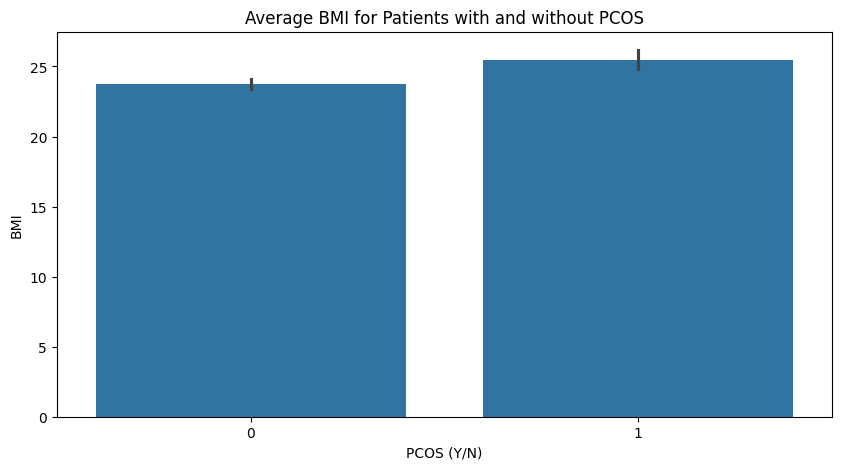

In [20]:
#Bar char
plt.figure(figsize=(10,5))
sns.barplot(x="PCOS (Y/N)", y="BMI", data=dwi1)
plt.title("Average BMI for Patients with and without PCOS")
plt.show()


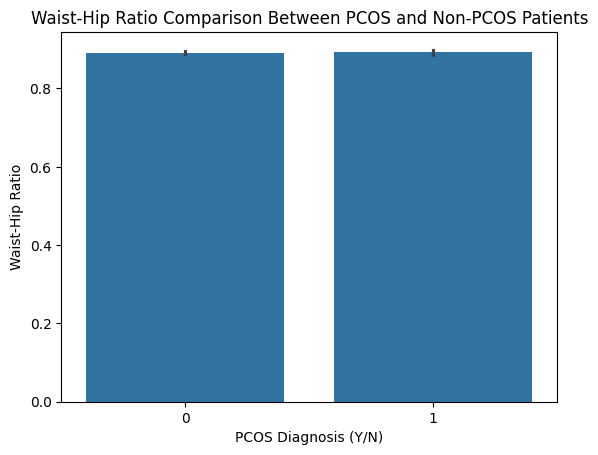

In [40]:
sns.barplot(x="PCOS (Y/N)", y="Waist:Hip Ratio", data=dwi1)
plt.xlabel("PCOS Diagnosis (Y/N)")
plt.ylabel("Waist-Hip Ratio")
plt.title("Waist-Hip Ratio Comparison Between PCOS and Non-PCOS Patients")
plt.show()


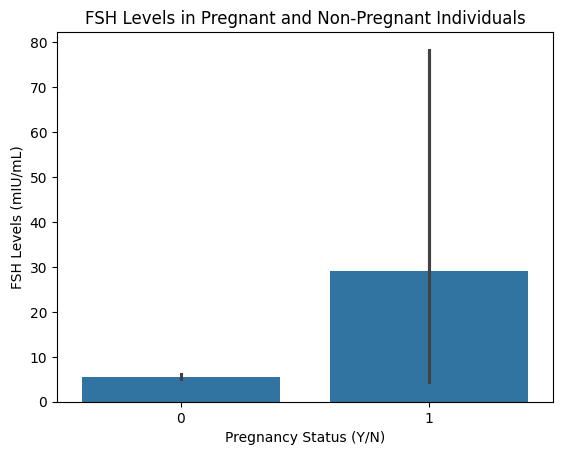

In [41]:
sns.barplot(x="Pregnant(Y/N)", y="FSH(mIU/mL)", data=dwi1)
plt.xlabel("Pregnancy Status (Y/N)")
plt.ylabel("FSH Levels (mIU/mL)")
plt.title("FSH Levels in Pregnant and Non-Pregnant Individuals")
plt.show()


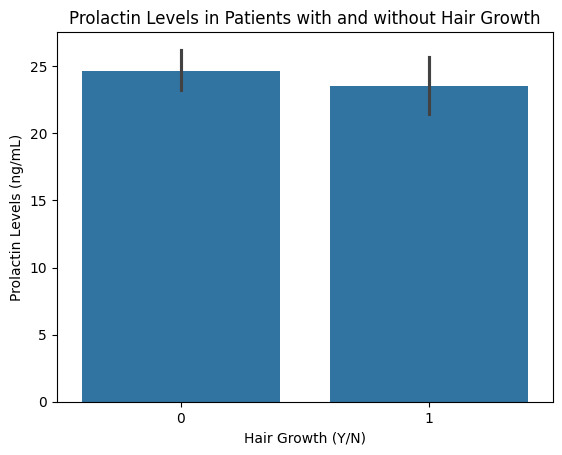

In [42]:
sns.barplot(x="hair growth(Y/N)", y="PRL(ng/mL)", data=dwi1)
plt.xlabel("Hair Growth (Y/N)")
plt.ylabel("Prolactin Levels (ng/mL)")
plt.title("Prolactin Levels in Patients with and without Hair Growth")
plt.show()


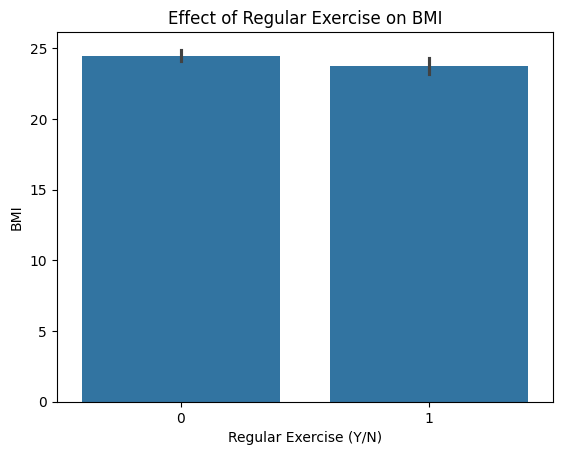

In [43]:
sns.barplot(x="Reg.Exercise(Y/N)", y="BMI", data=dwi1)
plt.xlabel("Regular Exercise (Y/N)")
plt.ylabel("BMI")
plt.title("Effect of Regular Exercise on BMI")
plt.show()


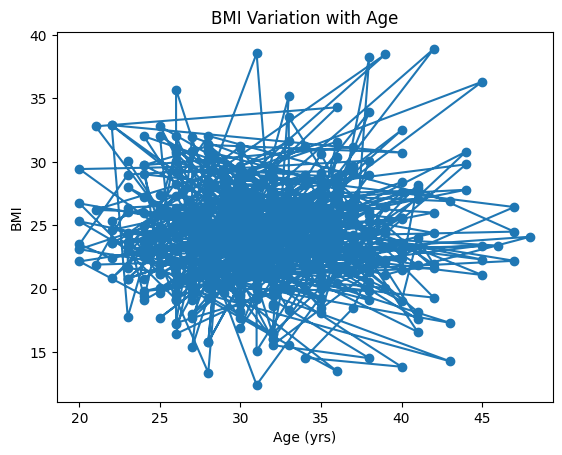

In [44]:
#Line Chart
dwi1.columns = dwi1.columns.str.strip()
#print(dwi1.columns.tolist())  # Show all column names as a list
plt.plot(dwi1["Age (yrs)"], dwi1["BMI"], marker='o', linestyle='-')
plt.xlabel("Age (yrs)")
plt.ylabel("BMI")
plt.title("BMI Variation with Age")
plt.show()

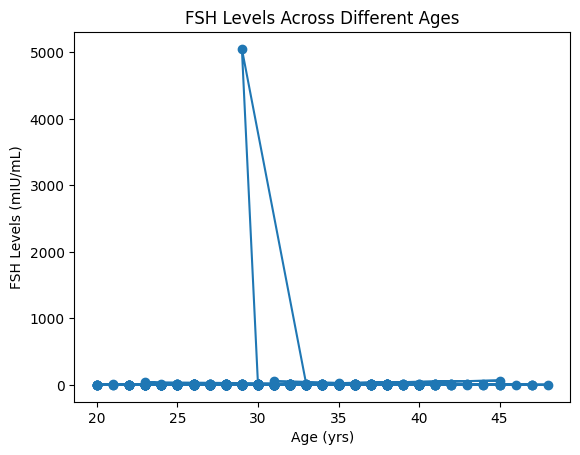

In [45]:
plt.plot(dwi1["Age (yrs)"], dwi1["FSH(mIU/mL)"], marker='o', linestyle='-')
plt.xlabel("Age (yrs)")
plt.ylabel("FSH Levels (mIU/mL)")
plt.title("FSH Levels Across Different Ages")
plt.show()


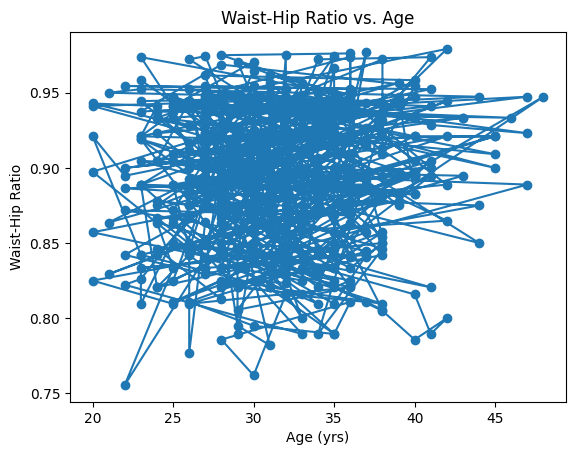

In [46]:
plt.plot(dwi1["Age (yrs)"], dwi1["Waist:Hip Ratio"], marker='o', linestyle='-')
plt.xlabel("Age (yrs)")
plt.ylabel("Waist-Hip Ratio")
plt.title("Waist-Hip Ratio vs. Age")
plt.show()


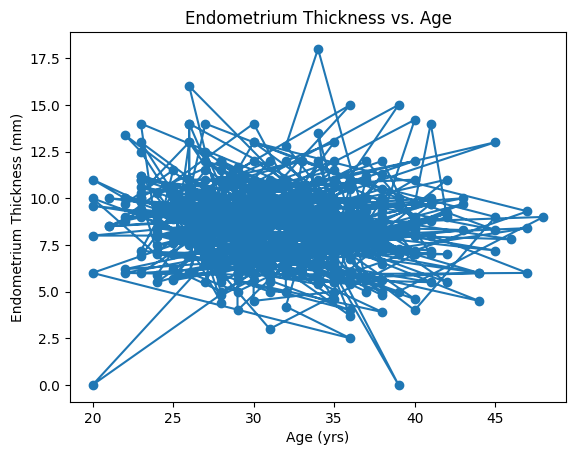

In [47]:
plt.plot(dwi1["Age (yrs)"], dwi1["Endometrium (mm)"], marker='o', linestyle='-')
plt.xlabel("Age (yrs)")
plt.ylabel("Endometrium Thickness (mm)")
plt.title("Endometrium Thickness vs. Age")
plt.show()


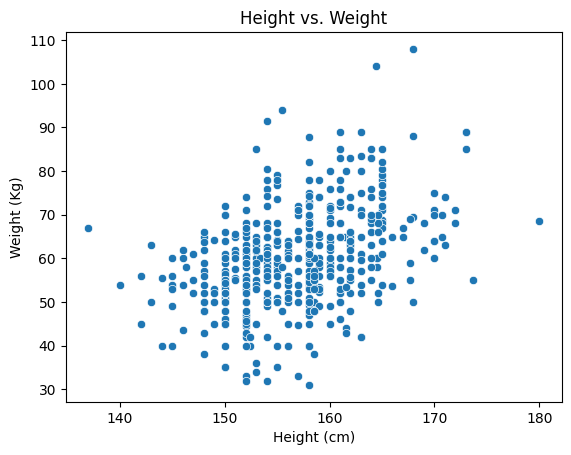

Correlation between Height and Weight: 0.42


In [48]:
# Scatter Plot: Height vs. Weight
#If corr is close to +1, there's a strong positive correlation (height ⬆ → weight ⬆).
#If corr is close to 0, there's no correlation.
#If corr is close to -1, there's a negative correlation (unlikely for height vs. weight).
sns.scatterplot(x=dwi1["Height(Cm)"], y=dwi1["Weight (Kg)"])
plt.xlabel("Height (cm)")
plt.ylabel("Weight (Kg)")
plt.title("Height vs. Weight")
plt.show()
corr = dwi1["Height(Cm)"].corr(dwi1["Weight (Kg)"])
print(f"Correlation between Height and Weight: {corr:.2f}")

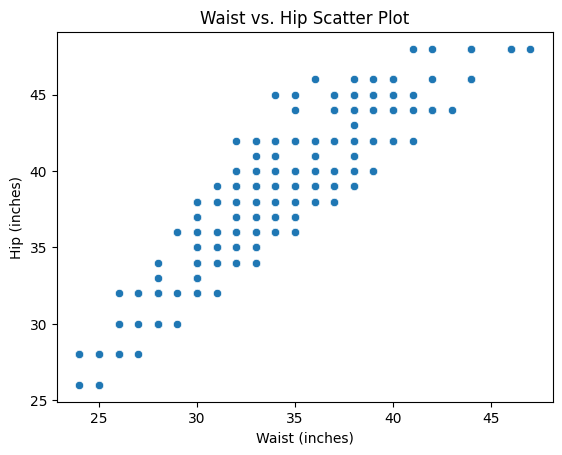

Correlation between Waist and Hip: 0.87


In [49]:
# Scatter Plot: Waist vs. Hip (Body Shape Analysis)
sns.scatterplot(x=dwi1["Waist(inch)"], y=dwi1["Hip(inch)"])
plt.xlabel("Waist (inches)")
plt.ylabel("Hip (inches)")
plt.title("Waist vs. Hip Scatter Plot")
plt.show()
corr = dwi1["Waist(inch)"].corr(dwi1["Hip(inch)"])
print(f"Correlation between Waist and Hip: {corr:.2f}")

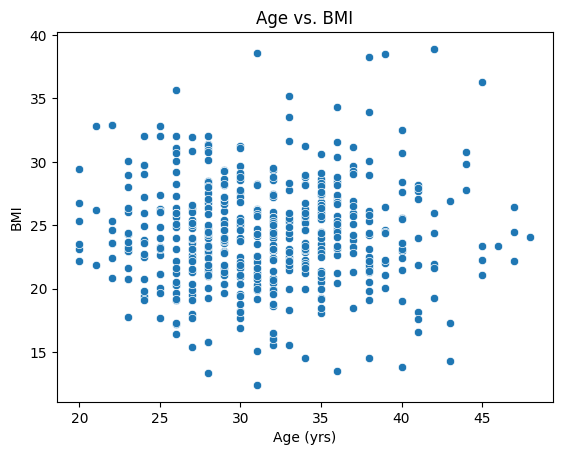

In [35]:
#Scatter Plot: Age vs. BMI
sns.scatterplot(x=dwi1["Age (yrs)"], y=dwi1["BMI"])
plt.xlabel("Age (yrs)")
plt.ylabel("BMI")
plt.title("Age vs. BMI")
plt.show()


In [36]:
 #Interactive Scatter Plot with Plotly Height vs. Weight (with PCOS category)
import plotly.express as px
fig = px.scatter(dwi1, x="Height(Cm)", y="Weight (Kg)", color="PCOS (Y/N)",
                 title="Height vs. Weight Interactive Scatter Plot",
                 labels={"Height(Cm)": "Height (cm)", "Weight (Kg)": "Weight (Kg)"})
fig.show()


In [38]:
#Age vs. FSH Levels (with Pregnancy Status)
fig = px.scatter(dwi1, x="Age (yrs)", y="FSH(mIU/mL)", color="Pregnant(Y/N)",
                 title="FSH Levels vs. Age",
                 labels={" Age (yrs)": "Age (years)", "FSH(mIU/mL)": "FSH Levels"})
fig.show()

In [39]:
#Waist vs. Hip (with PCOS Status)
fig = px.scatter(dwi1, x="Waist(inch)", y="Hip(inch)", color="PCOS (Y/N)",
                 title="Waist vs. Hip Scatter Plot (PCOS vs. Non-PCOS)",
                 labels={"Waist(inch)": "Waist (inches)", "Hip(inch)": "Hip (inches)"})
fig.show()